# <B>Cirebon Mask Classification Using Combined Feature Gray Level Co-Occurrence Matrix & Segmentation Fractal Texture Analysis Extractor and Convolutional Neural Network Sequential Classifier</B>

2024-07-15 09:51:17

Created by <b>Fendy Hendriyanto</b>

## <b>Import Library</b>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

## <b>Load Dataset</b>

In [2]:
trainData = pd.read_csv('data/dfCOMB_train.csv')
testData = pd.read_csv('data/dfCOMB_test.csv')
trainLabels = pd.read_csv('data/dfLTRAIN_train.csv')
testLabels = pd.read_csv('data/dfLTEST_test.csv')

In [3]:
combine = [trainData, testData, trainLabels, testLabels]
pd.concat(combine)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,506.93771,742.165345,530.442081,866.671751,0.175163,0.169320,0.177496,0.170005,0.900115,0.853773,...,2558.0,1.457192,94.966967,2331.0,1.493424,42.337827,2522.0,1.457192,94.966967,2331.0
1,452.071782,681.159091,506.568929,794.563131,0.161801,0.155731,0.162771,0.155705,0.891290,0.836331,...,2459.0,1.437986,90.326067,2156.0,1.487348,42.582395,2488.0,1.437986,90.326067,2156.0
2,582.026985,1399.285502,1102.061912,1376.575312,0.142958,0.136409,0.146532,0.136338,0.925417,0.820684,...,2421.0,1.448868,146.854179,1639.0,1.507132,64.738904,2884.0,1.460113,150.130284,1727.0
3,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
4,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels = trainLabels.iloc[:,0].unique()
print(labels)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


In [5]:
label = testLabels.iloc[:,0].unique()
print(label)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


## <b>Exploratory Data Analysis</b>

In [6]:
# Transform images to array
train = np.array(trainData)
test = np.array(testData)
train_label = np.array(trainLabels)
test_label = np.array(testLabels)

In [7]:
X_train = train
y_train = train_label
print(X_train)

[[5.06937710e+02 7.42165345e+02 5.30442081e+02 ... 1.45719228e+00
  9.49669670e+01 2.33100000e+03]
 [4.52071782e+02 6.81159091e+02 5.06568929e+02 ... 1.43798618e+00
  9.03260668e+01 2.15600000e+03]
 [5.82026985e+02 1.39928550e+03 1.10206191e+03 ... 1.46011291e+00
  1.50130284e+02 1.72700000e+03]
 ...
 [4.46644395e+02 6.37968278e+02 3.85697438e+02 ... 1.52637219e+00
  9.50370821e+01 1.64500000e+03]
 [4.49162941e+02 6.45556641e+02 3.87452975e+02 ... 1.52869730e+00
  9.48435252e+01 1.66800000e+03]
 [4.44997268e+02 6.43593455e+02 3.83911488e+02 ... 1.52466067e+00
  9.46614078e+01 1.64800000e+03]]


### Encode The Data Labels

In [8]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train[:,0])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

### Normalization Data

In [ ]:
# Normalize the feature data
X = X_train.astype('float32') / 255.0
print(X_train.shape)

### Feature Scaling

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.48636612 -0.46213073 -0.39995366 ...  0.7716364  -1.3010662
   2.2166388 ]
 [ 0.00774367 -0.6631873  -0.4906403  ...  0.5133294  -1.4669949
   1.7250417 ]
 [ 1.141407    1.7035221   1.771455   ...  0.8109163   0.6712162
   0.5199271 ]
 ...
 [-0.03960183 -0.8055302  -0.9497941  ...  1.7020465  -1.2985594
   0.2895786 ]
 [-0.01763167 -0.7805213  -0.9431255  ...  1.7333174  -1.3054796
   0.3541885 ]
 [-0.05397086 -0.7869913  -0.95657843 ...  1.679029   -1.311991
   0.29800618]]


## <b>Splitting Data</b>

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Training : ", X_train.shape, y_train.shape)
print("Data Testing : ", X_test.shape, y_test.shape)

Data Training :  (800, 28) (800,)
Data Testing :  (200, 28) (200,)


In [12]:
# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
print(f'Data Training With Shape : ', X_train.shape, y_train.shape)
print(f'Data Testing With Shape, : ', X_test.shape, y_test.shape)

Data Training With Shape :  (800, 28, 1) (800,)
Data Testing With Shape, :  (200, 28, 1) (200,)


## Modelling With CNN

In [14]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)            

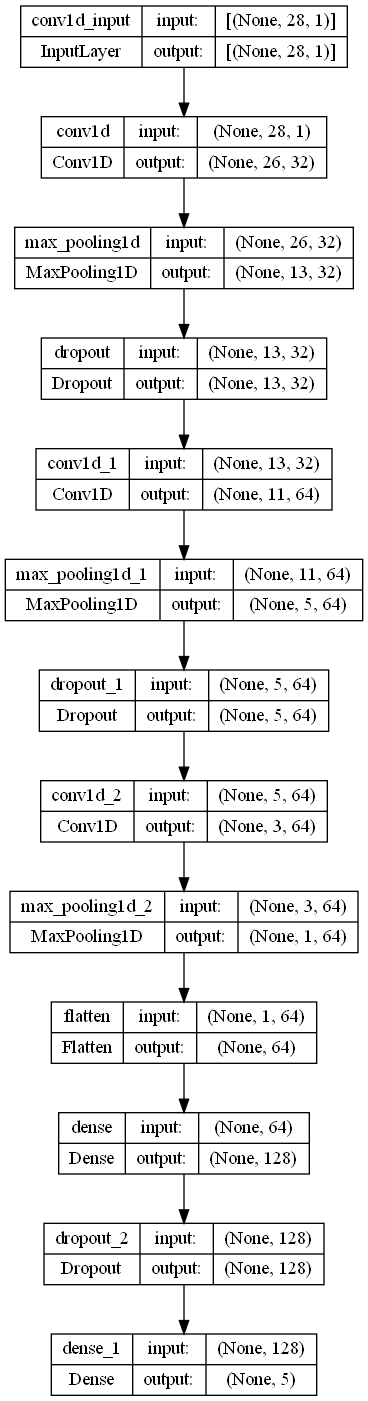

In [15]:
# Create plot model from define model CNN
tf.keras.utils.plot_model(model, to_file='model/model-cnn.png', show_shapes=True, show_layer_names=True)

In [16]:
# Compile model for CNN
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
BATCH_SIZE = 64
EPOCHS = 20

history = model.fit(X_train, y_train, 
                    epochs = EPOCHS, 
                    batch_size = BATCH_SIZE, 
                    validation_data=(X_test, y_test), 
                    verbose = 1)

Epoch 1/20


13/13 [==============================] - 3s 36ms/step - loss: 1.4194 - accuracy: 0.3275 - val_loss: 1.2978 - val_accuracy: 0.6100
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 1.0986 - accuracy: 0.6000 - val_loss: 0.9708 - val_accuracy: 0.7950
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.7710 - accuracy: 0.7713 - val_loss: 0.5778 - val_accuracy: 0.8750
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5075 - accuracy: 0.8562 - val_loss: 0.3542 - val_accuracy: 0.8850
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.3170 - accuracy: 0.9137 - val_loss: 0.1720 - val_accuracy: 0.9450
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.2090 - accuracy: 0.9200 - val_loss: 0.1378 - val_accuracy: 0.9200
Epoch 7/20
13/13 [==============================] - 0s 15ms/step - loss: 0.1523 - accuracy: 0.9388 - val_loss: 0.0850 - val_accuracy: 0.9700
Epoch 8/20


## <b>Evaluation Model</b>

In [18]:
# Evaluate the Model
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

7/7 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9950
Loss: 0.0159
Accuracy: 0.9950


### Accuracy and Loss Plot

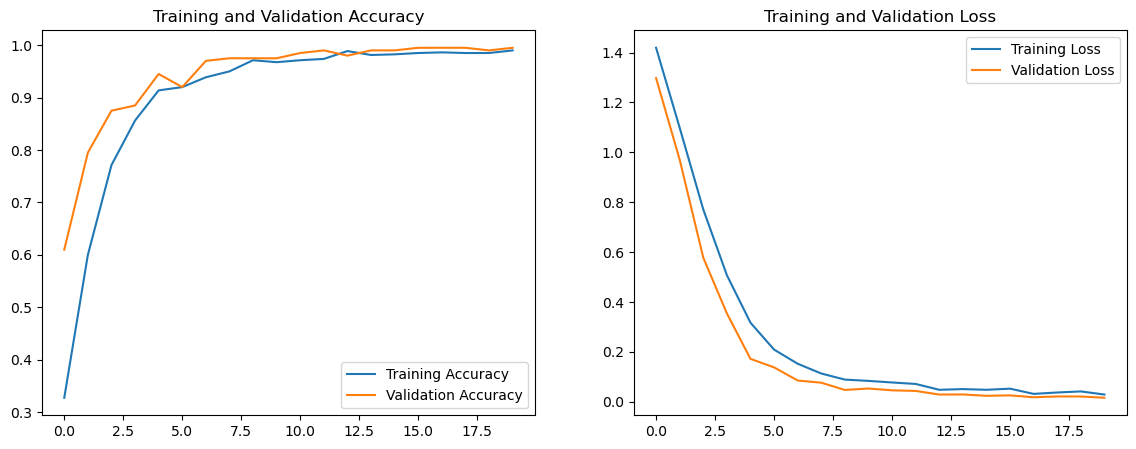

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix

7/7 [==============================] - 0s 3ms/step


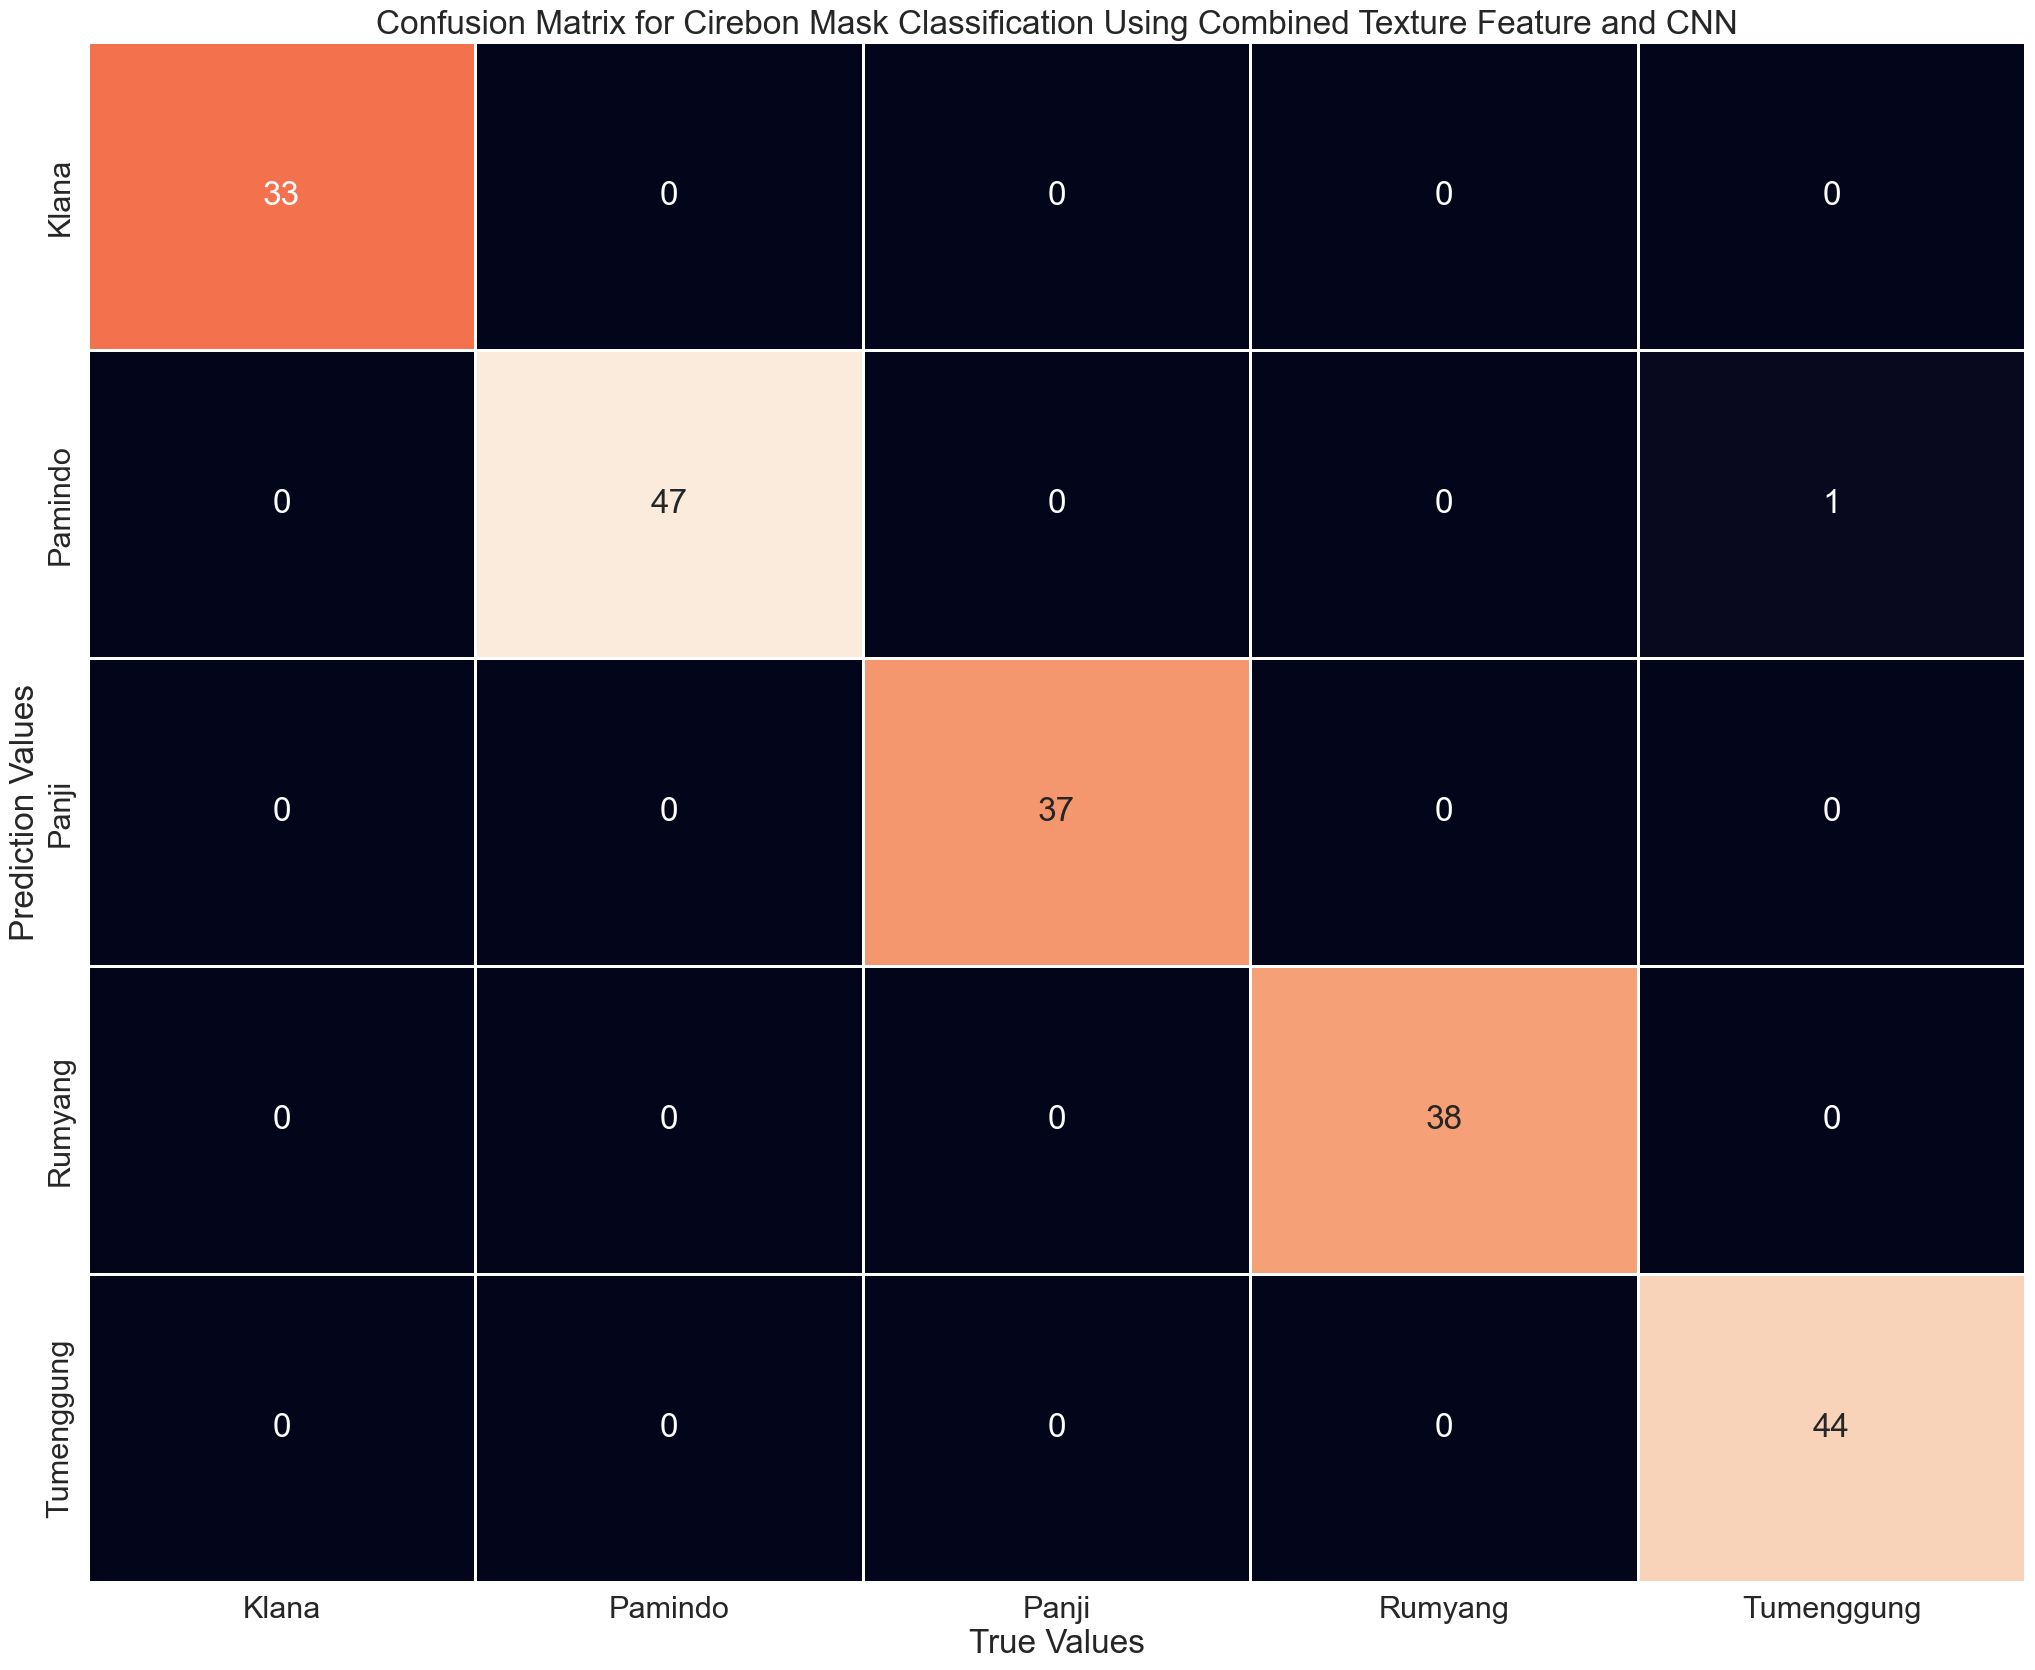

In [20]:
# Get Model Predictions for test data
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = np.argmax(model.predict(X_test), axis = 1)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using Combined Texture Feature and CNN")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

### Classification Report

In [21]:
# Evaluate Model from Classification Report
print(classification_report(y_test, Y_pred, target_names = class_names))

              precision    recall  f1-score   support

       Klana       1.00      1.00      1.00        33
     Pamindo       1.00      0.98      0.99        48
       Panji       1.00      1.00      1.00        37
     Rumyang       1.00      1.00      1.00        38
  Tumenggung       0.98      1.00      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



### Reporting Model 

In [22]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Test': [],
                           'Epochs': [],
                           'Batch_size':[],
                           'Loss': [],
                           'Accuracy': []
                           })

r = evaluation.shape[0]
evaluation.loc[r] = [model, str(X_train.shape), str(X_test.shape), 30, 32, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Test,Epochs,Batch_size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",30,32,0.01586,0.995


In [23]:
dict = {"Model" : evaluation.Model,
        "Data Train" : evaluation.Data_Train,
        "Data Test" : evaluation.Data_Test,
        "Epochs" : evaluation.Epochs,
        "Batch Size" : evaluation.Batch_size,
        "Loss" : evaluation.Loss,
        "Accuracy" : evaluation.Accuracy
        }

df = pd.DataFrame(dict)
# Save to Drive for CSV data
df.to_csv(r"data/hasil_model.csv", index=False)
df

,Model,Data Train,Data Test,Epochs,Batch Size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",30,32,0.01586,0.995


## Save Model

In [24]:
# Save the model
MODEL_PATH = 'model/'
tf.saved_model.save(model, os.path.join(MODEL_PATH, 'saved_model'))

INFO:tensorflow:Assets written to: model/saved_model\assets


INFO:tensorflow:Assets written to: model/saved_model\assets


In [26]:
tf.keras.models.save_model(model, os.path.join(MODEL_PATH, 'base_model.json'))

INFO:tensorflow:Assets written to: model/base_model.json\assets


INFO:tensorflow:Assets written to: model/base_model.json\assets
